# SVM을 이용한 비만도 판별하기

#### 명제 : 컴퓨터가 비만을 학습할 수 있는가?

BMI = <몸무게(kg)> / <키(m)> * <키(m)>

BMI 지수가 18 이상 25 미만일 경우 표준 몸무게에 해당된다.

### 사전 데이터 수집

무작위로 2만명의 데이터를 가공

- 1) 키 cm
- 2) 몸무게 kg
- 3) 저체중 thin
- 4) 정상 normal
- 5) 비만 fat

In [ ]:
import random

# BMI를 계산하여 레이블을 반환하는 함수

def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5:
        return 'thin'
    if bmi < 25:
        return 'normal'
    return 'fat'

# 출력 파일 생성
# 주의사항 : 콤마기호 다음에 한칸을 띄우면 실제 열이름에 공백이 들어가짐(실행 오류 발생 가능)
fp = open('bmi.csv', 'w', encoding='utf-8')
fp.write('height,weight,label\r\n')

# 랜덤함수를 이용한 무작위 데이터 생성
cnt = {'thin':0, 'normal':0, 'fat':0}

for i in range(20000):
    h = random.randint(100, 250)
    w = random.randint(45, 120)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write('{0}, {1}, {2}\r\n'.format(h, w, label))
fp.close()

print('Done',cnt)

### SVM 으로 분석하기

In [5]:
# Part 1

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

In [4]:
# Part 2

import pandas as pd

# 키와 몸무게 데이터 읽어들이기
tbl = pd.read_csv('bmi.csv')

# 칼럼(열)을 자르고 정규화하기 (현재값 / 전체 카운트값)
label = tbl['label']
w = tbl['weight'] / 120  # 최대 몸무게 120 기준으로
h = tbl['height'] / 250  # 최대 키 250 기준으로
wh = pd.concat([w,h], axis = 1)

In [14]:
# Part 3 ---- 머신러닝

train_data, test_data, train_label, test_label = train_test_split(wh, label)

# print(len(train_data)) # 15000개 학습용
# print(len(test_data))  # 5000개 테스트용

clf = svm.SVC()
clf.fit(train_data, train_label)

predict = clf.predict(test_data)
print('예측결과 : ', predict)
print()

score = metrics.accuracy_score(test_label, predict)
print('정확도 : ', score)
print('-'*60)

report = metrics.classification_report(test_label, predict)
print('REPORT')
print('-'*60)
print(report)

예측결과 :  [' fat' ' thin' ' fat' ... ' fat' ' fat' ' thin']

정확도 :  0.9952
------------------------------------------------------------
REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

         fat       1.00      1.00      1.00      2648
      normal       0.99      0.99      0.99      1043
        thin       1.00      0.99      1.00      1309

    accuracy                           1.00      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       1.00      1.00      1.00      5000



# MLPClassifier ** 참고

In [19]:
# Part 3 ---- 머신러닝

from sklearn.neural_network import MLPClassifier

train_data, test_data, train_label, test_label = train_test_split(wh, label)

# print(len(train_data)) # 15000개 학습용
# print(len(test_data))  # 5000개 테스트용

clf = MLPClassifier()
clf.fit(train_data, train_label)

predict = clf.predict(test_data)
print('예측결과 : ', predict)
print()

score = metrics.accuracy_score(test_label, predict)
print('정확도 : ', score)
print('-'*60)

report = metrics.classification_report(test_label, predict)
print('REPORT')
print('-'*60)
print(report)

예측결과 :  [' thin' ' fat' ' fat' ... ' normal' ' fat' ' normal']

정확도 :  0.9938
------------------------------------------------------------
REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

         fat       1.00      1.00      1.00      2691
      normal       0.98      0.99      0.98       957
        thin       1.00      0.99      0.99      1352

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



c:\users\tj\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 비만도 시각화

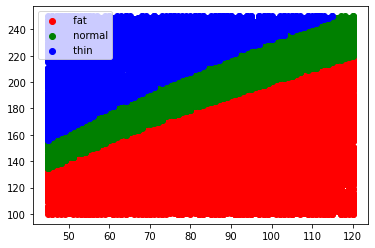

In [17]:
import matplotlib.pyplot as plt

tbl = pd.read_csv('bmi.csv', index_col = 2)

# 그래프 그리기
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 지정된 레이블을 임의 색으로 칠하기
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'], b['height'], c=color, label=lbl)
    
scatter(' fat','red')
scatter(' normal','green')
scatter(' thin','blue')

ax.legend() # 범례
plt.savefig('bmi_random.png')
plt.show()

# 사이킷런에 내장된 데이터셋 **참고

http://archive.ics.uci.edu/ml/index.php

|데이터 로드 방법 | 데이터명|
|-|-|
|load_boston([return_X_y]) | 보스턴 주택가격 데이터|
|load_iris([return_X_y]) | 붓꽃 데이터|
|load_diabetes([return_X_y]) | 당뇨병 데이터|
|load_digits([return_X_y]) | 손글씨 데이터|
|load_linnerud([return_X_y]) | 운동 능력 데이터|
|load_wine([return_X_y]) | 와인 데이터|
|load_breast_cancer([return_X_y]) | 위스콘신 유방암 데이터|

# 사이킷런 내장 데이터 호출하기 **참고

In [7]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['Species'])

df = pd.concat([X,y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
